In [94]:
# import libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [120]:
# D:\StudyTime\ProgrammingWorld\CodeZone\Development\Python\PressureGaugeReader\Data\Train
# D:\StudyTime\ProgrammingWorld\CodeZone\Development\AI_ML\Python\PressureGaugeReader\Images\GaugeDataGenerated\gauge\Train
train_path = "../Python/PressureGaugeReader/Images/out2/Train"
test_path = "../Python/PressureGaugeReader/Images/out2/Test"
validate_path = "../Python/PressureGaugeReader/Images/out2/Validate"

train_path = "../Python/PressureGaugeReader/Images/out2_gauge1dial/Train"
test_path = "../Python/PressureGaugeReader/Images/out2_gauge1dial/Test"
validate_path = "../Python/PressureGaugeReader/Images/out2_gauge1dial/Validate"

MODEL = "../Python/PressureGaugeReader/Models/Gauge1_Digits_41_Class_model.h5"
TF_MODEL = "../Python/PressureGaugeReader/Models/Gauge1_Digits_41_Class_model.tflite"


In [96]:
batch_size = 16
img_height = 100
img_width = 100

In [97]:
# Create Image data generator  for Trainset
train_image_gen = ImageDataGenerator(
    rescale=1./255
    # ,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

test_data_gen = ImageDataGenerator(
    rescale=1./255
    # ,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

validate_data_gen = ImageDataGenerator(
    rescale=1./255
    # ,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

In [98]:
train = train_image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='categorical', # 2 class -> binary, Multiple Class -> categorical
    batch_size=batch_size
)
test = test_data_gen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    color_mode='rgb',
    shuffle=False, # setting suffle false to avoid indexing problem while comparing with predicted values
    class_mode='categorical', # 2 class -> binary, Multiple Class -> categorical
    batch_size=batch_size
)
validate = validate_data_gen.flow_from_directory(
    validate_path,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='categorical', # 2 class -> binary, Multiple Class -> categorical
    batch_size=batch_size
)

Found 37330 images belonging to 41 classes.
Found 10127 images belonging to 41 classes.
Found 10201 images belonging to 41 classes.


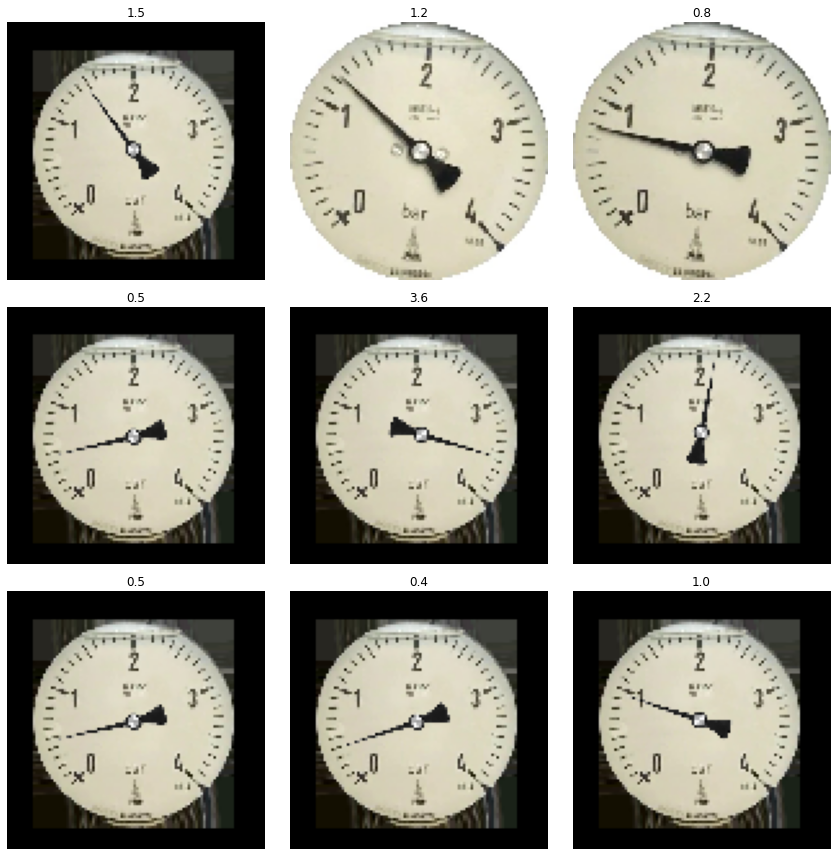

In [103]:
plt.figure(figsize=(12,12))
dic = {0:'0.0-0.5', 1:'0.5-1.0', 2:'1.0-1.5'}
dic = {0:'0.0-1.0', 1:'1.1-2.0', 2:'2.1-3.0', 3:'3.1-4.0'}
dic = {0:'0.0', 1:'0.1', 2:'0.2', 3:'0.3', 4:'0.4', 5:'0.5', 6:'0.6', 7:'0.7', 8:'0.8', 9:'0.9', 10:'1.0', 11:'1.1', 12:'1.2'}
dic = {0:'0.0', 1:'0.1', 2:'0.2', 3:'0.3', 4:'0.4', 5:'0.5', 6:'0.6', 7:'0.7', 8:'0.8', 9:'0.9', 10:'1.0', 11:'1.1', 12:'1.2', 13:'1.3', 14:'1.4', 15:'1.5', 16:'1.6', 17:'1.7', 18:'1.8', 19:'1.9', 20:'2.0', 21:'2.1', 22:'2.2', 23:'2.3', 24:'2.4', 25:'2.5', 26:'2.6', 27:'2.7', 28:'2.8', 29:'2.9', 30:'3.0', 31:'3.1', 32:'3.2', 33:'3.3', 34:'3.4', 35:'3.5', 36:'3.6', 37:'3.7', 38:'3.8', 39:'3.9', 40:'4.0'}

for i in range(0,9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in train:
        image = x_batch[0]
        for i in range(0, len(y_batch[0])):
            if(y_batch[0][i] == 1):
                plt.title(dic.get(i))
        plt.axis('off')
        plt.imshow(image)
        break

plt.tight_layout()
plt.show()

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [105]:
cnn =Sequential()
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3,3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3,3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='relu', units=64))


In [106]:
# cnn.add(Dense(activation='softmax', units=13))
cnn.add(Dense(activation='softmax', units=41))

#Loss_fn = tf.keras.Losses.CategoricalCrossEntropy()
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#cnn.add(Dense(activation='sigmoid', units=1))
#cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 10, 10, 32)      

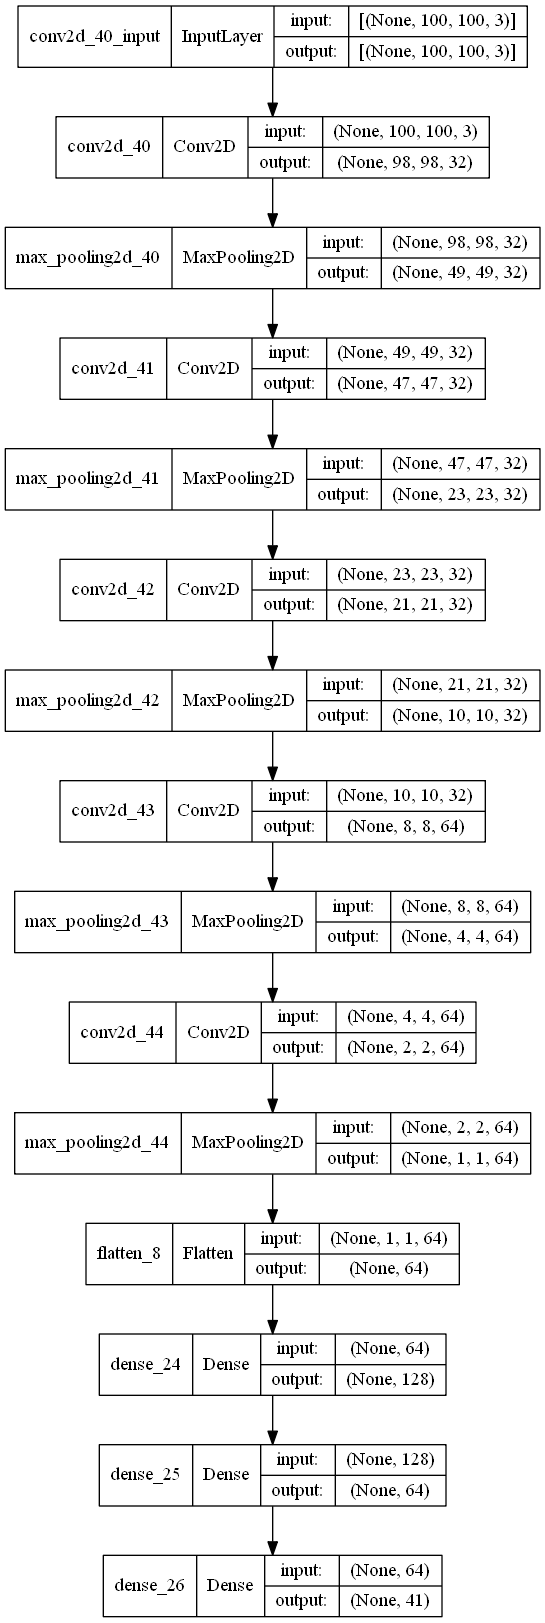

In [108]:
from tensorflow.keras.utils import plot_model
plot_model(cnn, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [109]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(
    class_weight = 'balanced', 
    classes = np.unique(train.classes), 
    y = train.classes
    )
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 0.8737886803052292, 1: 1.18862637712539, 2: 1.1583814311425558, 3: 1.1948658856667307, 4: 1.0813394357221482, 5: 1.138109756097561, 6: 1.1076493976618598, 7: 1.0813394357221482, 8: 0.8202592836739179, 9: 1.012778425893269, 10: 0.9281221252579498, 11: 0.8737886803052292, 12: 0.6340444323663292, 13: 1.0116531165311653, 14: 1.0116531165311653, 15: 1.0116531165311653, 16: 1.0116531165311653, 17: 1.0116531165311653, 18: 1.0116531165311653, 19: 1.0116531165311653, 20: 1.0116531165311653, 21: 1.0116531165311653, 22: 1.0116531165311653, 23: 1.0116531165311653, 24: 1.0116531165311653, 25: 1.0116531165311653, 26: 1.0116531165311653, 27: 1.0116531165311653, 28: 1.0116531165311653, 29: 1.0116531165311653, 30: 1.0116531165311653, 31: 1.0116531165311653, 32: 1.0116531165311653, 33: 1.0116531165311653, 34: 1.0116531165311653, 35: 1.0116531165311653, 36: 1.0116531165311653, 37: 1.0116531165311653, 38: 1.0116531165311653, 39: 1.0116531165311653, 40: 1.0116531165311653}


In [110]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.3,min_lr=0.000001)
callback_list = [learning_rate_reduction, early]

In [111]:
cnn.fit(train, epochs=100, validation_data=validate, class_weight=cw, callbacks=callback_list)

Epoch 1/100
2334/2334 [==============================] - 1220s 522ms/step - loss: 0.4090 - accuracy: 0.8857 - val_loss: 1.6116 - val_accuracy: 0.5165 - lr: 0.0010
Epoch 2/100
2334/2334 [==============================] - 1345s 576ms/step - loss: 0.0376 - accuracy: 0.9892 - val_loss: 2.4811 - val_accuracy: 0.5006 - lr: 0.0010
Epoch 3/100
2334/2334 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9923
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
2334/2334 [==============================] - 1532s 656ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 1.9564 - val_accuracy: 0.5379 - lr: 0.0010
Epoch 4/100
2334/2334 [==============================] - 1551s 665ms/step - loss: 0.0081 - accuracy: 0.9962 - val_loss: 2.2412 - val_accuracy: 0.5157 - lr: 3.0000e-04


In [112]:
#pd.DataFrame(cnn.history.history).plot()

In [113]:
test_accu = cnn.evaluate(test)
print('Testing accuracy = ', test_accu[1]*100, '%')

633/633 [==============================] - 85s 131ms/step - loss: 0.0965 - accuracy: 0.9698
Testing accuracy =  96.97837233543396 %


In [114]:
preds = cnn.predict(test,verbose=1)

633/633 [==============================] - 58s 85ms/step


In [115]:
predictions = preds.copy()

In [116]:
from sklearn.metrics import classification_report
y_pred = cnn.predict(test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(test.classes, y_pred_bool))

633/633 [==============================] - 57s 90ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.93      0.96       252
           2       1.00      1.00      1.00       252
           3       1.00      0.90      0.95       240
           4       0.92      1.00      0.96       260
           5       1.00      1.00      1.00       250
           6       1.00      1.00      1.00       252
           7       1.00      1.00      1.00       260
           8       0.85      1.00      0.92       279
           9       1.00      0.84      0.91       300
          10       1.00      0.47      0.64       282
          11       0.57      0.75      0.64       261
          12       0.78      1.00      0.88       239
          13       1.00      1.00      1.00       240
          14       1.00      1.00      1.00       240
          15       1.00      1.00      1.00       240
          16       1.00 

In [117]:
predictions

array([[1.0000000e+00, 1.3177457e-08, 1.1193899e-18, ..., 3.1247795e-20,
        4.9342581e-16, 4.4421161e-15],
       [9.9999797e-01, 1.5313155e-06, 9.7125943e-16, ..., 3.9404060e-20,
        1.8783457e-16, 3.3172010e-15],
       [1.0000000e+00, 1.3177457e-08, 1.1193899e-18, ..., 3.1247795e-20,
        4.9342581e-16, 4.4421161e-15],
       ...,
       [7.2664312e-07, 4.0751920e-15, 3.1188105e-20, ..., 5.4056996e-14,
        1.0027345e-07, 9.9999917e-01],
       [7.2664312e-07, 4.0751920e-15, 3.1188105e-20, ..., 5.4056996e-14,
        1.0027345e-07, 9.9999917e-01],
       [7.2664312e-07, 4.0751920e-15, 3.1188105e-20, ..., 5.4056996e-14,
        1.0027345e-07, 9.9999917e-01]], dtype=float32)

In [124]:
cnn.save(MODEL)

In [125]:
#input_meta.name = "image"
#input_meta.des

In [126]:
# from tflite_support import flatbuffers  
# model_fle = "gauge.tflite"
# populator = _metadata.Me

In [127]:
import tensorflow as tf
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(MODEL)
tflite_model = converter.convert()
if(open(TF_MODEL, "wb").write(tflite_model)):
    print("Model conversion succesful")
else:
    print("Model conversion failed")

INFO:tensorflow:Assets written to: C:\Users\Kunnu\AppData\Local\Temp\tmpfwl020r4\assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from C:\Users\Kunnu\AppData\Local\Temp\tmpfwl020r4\variables\variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_40_input
INFO:tensorflow: tensor name: serving_default_conv2d_40_input:0, shape: (-1, 100, 100, 3), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_26
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 41), type: DT_FLOAT
I

Model conversion succesful


In [ ]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import cv2
import numpy as np

In [ ]:
model = load_model('gauge.h5')

In [ ]:
# m=load_model("gauge.h5")

testPic="../Python/Pressure Gauge Reader/Data2/Test/0/img0054.jpg"
# im=Image.open(testPic).convert('RGB')
# data=np.array(im,dtype=np.float32)
# data=np.reshape(500, 500,3)
# pre=m.predict_classes(data)
# pre

In [ ]:
img = image.load_img(testPic , target_size=(100,100))
img  = image.img_to_array(img)
img  = img.reshape((1,) + img.shape)
# img  = img/255
img = img.reshape(-1,)

FileNotFoundError: [Errno 2] No such file or directory: '../Python/Pressure Gauge Reader/Data2/Test/0/img0054.jpg'

In [ ]:
# img_class=model.predict_classes(img) 
img_class=model.predict(img, verbose=1)
# this model above was already trained 
# code from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-#neural-networks-python-keras/
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

ValueError: in user code:

    File "D:\AppStore\StudySofta\ML\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "D:\AppStore\StudySofta\ML\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\AppStore\StudySofta\ML\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "D:\AppStore\StudySofta\ML\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "D:\AppStore\StudySofta\ML\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\AppStore\StudySofta\ML\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "conv2d_5" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None
